<a href="https://colab.research.google.com/github/ankitagithub13/capstone-chatbot/blob/EDA/Capstone_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Capstone Project - Exploratory Data Analysis (EDA)

Let's build a Data dictionary to explain the metadata and provide a description of the data fields

In [138]:
NLPChatbot_Dict={'Data': 'Timestamp or time/date information', 
                         'Countries': 'Which country the accident occurred (anonymised)', 
                         'Local': 'The city where the manufacturing plant is located (anonymised)',
                         'Industry sector': 'Which sector the plant belongs to',
                         'Accident level': 'From I to VI, it registers how severe was the accident (I means not severe but VI means very severe)',
                         'Potential Accident Level': 'Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)',
                         'Gender': 'If the person is male of female',
                         'Employee or Third Party': 'If the injured person is an employee or a third party',
                         'Critical Risk':'Some description of the risk involved in the accident',
                         'Description':'Detailed description of how the accident happened'}
  

In [139]:
NLPChatbot_Dict.get('Critical Risk')

'Some description of the risk involved in the accident'

In [140]:
NLPChatbot_Dict.keys()

dict_keys(['Data', 'Countries', 'Local', 'Industry sector', 'Accident level', 'Potential Accident Level', 'Gender', 'Employee or Third Party', 'Critical Risk', 'Description'])

In [141]:
# let's start by first importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [142]:
# Let's turn the warning messages off
import warnings
warnings.filterwarnings("ignore")

In [143]:
%cd /content/drive/My Drive/Capstone Project

/content/drive/My Drive/Capstone Project


In [144]:
# Let's import the Data set
cap_data=pd.read_csv('Data Set - industrial_safety_and_health_database_with_accidents_description.csv')

In [145]:
# We note that there are 11 columns, and can already see that the that columns like'unnamed', 'data', 'countries' 'Local (anonymized location/city'  might not be usefuy=l which 
# we can confirm on subsquent analysis 
print("Number of columns:",len(cap_data.columns))
cap_data.columns

Number of columns: 11


Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

In [146]:
# We note there are 425 observations, which may seem relatively small compared to the other datasets dealt with in the past 
print('Data Observations are:', cap_data.shape[0])
cap_data.head()

Data Observations are: 425


,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [147]:
# There are two things we note here i) only the Unnamed column dtype is integer i.e. int64 ii) There are no missing values, which we can also confirm via the 
# isnull/isna function going forward

cap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [148]:
# let's reconfirm if there are any missing / nan values in the dataset
# We note that the below summary suggest that there are no missing values 
cap_data.isna().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [149]:
cap_data.isnull().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [150]:
# let's look at teh descibe function to see if we can pick up any other insights 
cap_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,425,NaN,NaN,NaN,224.085,125.527,0,118,226,332,438
Data,425,287,2017-02-08 00:00:00,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Countries,425,3,Country_01,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Local,425,12,Local_03,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry Sector,425,3,Mining,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Accident Level,425,5,I,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Potential Accident Level,425,6,IV,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,425,2,Male,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employee or Third Party,425,3,Third Party,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Critical Risk,425,33,Others,232,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Analysis - We note the following: 

i) There are no missing values - which we have also noted above

ii) Countries -  There are 3 unique countries represented in the data, for which Country_01 has the highest i.e. ~ 60% 

iii) Cities-  Across the three countries there are 12 anonmized cities/locations, represented in the data for which 'Local_03' city has the highest frequency i.e. little over 20% 

iv) Industry Sector - There are 3 industry sectors , with mining carrying the highest representation i.e. over 50% 

v) Accident level - though there are 6 categories as per the meta data i.e. 01 to 06, and 01 being lowest severity, and 6 being highest sverity; only 01 to 05 categories are represented in the dataset, indicating that there were no incidents where highest severity of 6 (VI) was witnessed. To add, the highest representation is from severity level 01 (l), representing ~ 74% of the data.

vi) Potential Accident level- As noted in the metadata, for each incident the potential accident level is noted, and there are 6 categories, i.e. 01 to 06, and 01 being lowest severity, and 6 being highest sverity. Accident severity of 4 (lV) carries the largest representation i.e. 34%

vii) Genre/Gender - The data has significantly more representation from Male than Female i.e. 95% 

viii) Employee/Third party - Ther are 3 categories, with third party category having the highest representation 

iX) Critical Risk - There are 33 types of critical risk, with other carrying the highest representation of ~ 55% 

x) Description - It appears that there are 411 unique description of the incident / accident, and activity description on the lines of 'During the activity of chuteo of ore in hopper....' seems to have the highest occurence of 3. 


In [151]:
# Let's check further on the description that are repeated incidents by using the duplicated function
# We note that there are a total of 14 records that are same in terms of description(i.e. repeated twice or more)
# While we have seen the duplicates by description column, let's see if there are any duplicates by all columns except unnamed 

print(len(cap_data[cap_data.duplicated(subset=['Description'],keep=False)]))
cap_data[cap_data.duplicated(subset=['Description'],keep=False)]

26


,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
37,37,2016-02-24 00:00:00,Country_02,Local_07,Mining,I,V,Male,Employee,Others,When starting the activity of removing a coil ...
38,38,2016-02-24 00:00:00,Country_02,Local_07,Mining,I,V,Female,Third Party,Others,When starting the activity of removing a coil ...
76,88,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
77,89,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
130,142,2016-05-26 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Bees,"In the geological reconnaissance activity, in ..."
131,143,2016-05-26 00:00:00,Country_03,Local_10,Others,I,I,Male,Employee,Others,"In the geological reconnaissance activity, in ..."
143,155,2016-06-08 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Bees,Project of Vazante that carried out sediment c...
144,156,2016-06-08 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Others,Project of Vazante that carried out sediment c...
166,180,2016-07-07 00:00:00,Country_01,Local_03,Mining,IV,V,Male,Third Party,Others,At moments when the MAPERU truck of plate F1T ...
167,181,2016-07-07 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,At moments when the MAPERU truck of plate F1T ...


In [152]:
# We note that out of the 26 records, there are 13 records where all the input values are the sames for all columns except the Unnamed column
# While it is not entirely clear whether or not these are duplicates, we note that thera are instance where the duplicate record are in squence, indicating that 
# perhaps the entry may have been made twice due to oversight / human error 

# All in all there are, 6 unique records having 7 duplicates values in total i.e.2% of the data 

# While we will keep the duplicates for now, during the model building phase we will test whether or not we should drop them, as due to the low no. of records, it could 
# potentially serve the same purpose as synthetic data and help create a more robust model. 

print(len(cap_data[cap_data.duplicated(subset=['Data','Countries','Local','Industry Sector','Accident Level','Potential Accident Level','Genre',
                                     'Employee or Third Party', 'Critical Risk', 'Description'],keep=False)]))

cap_data[cap_data.duplicated(subset=['Data','Countries','Local','Industry Sector','Accident Level','Potential Accident Level','Genre',
                                     'Employee or Third Party', 'Critical Risk', 'Description'],keep=False)]

13


,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
76,88,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
77,89,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
261,275,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
262,276,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
302,316,2017-01-21 00:00:00,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
303,317,2017-01-21 00:00:00,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
344,358,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
345,359,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
346,360,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
354,368,2017-03-15 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...


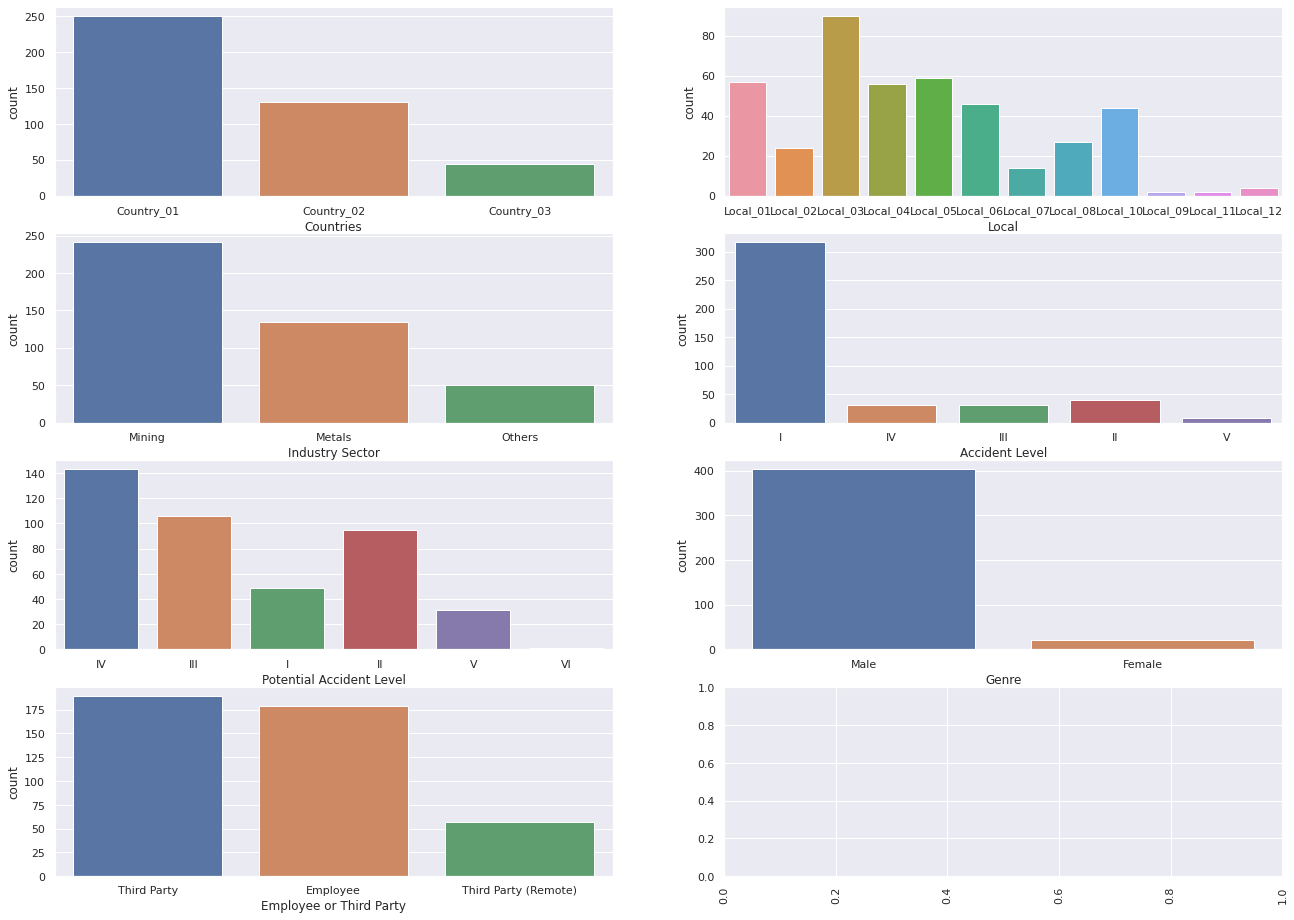

In [153]:
# Let's look at a combined jointplot for columns except critical risk; as crtical risk has 33 categories we will view it seprately to have a more comprehensive visualization 
# As we noted from the 'describe function above some of the observations are: 
# 1) Country - Country 1 has the highest representation, country 3 has the lowest representation.
# 2) City/Location - Location_03 has the highest instance of records , and location_10 & location_11 have the loqest instance 
# 3) Industry - Mining has the highest instances of records, Other has the lowest instance of records - it is not clear which other sectors are included   
# 4) Accident Level (severity)  - 1 has the highest instance of accident levels; 5 has the lowest levels
# 5) Potential accidenht level - 4 has the highest instance of accidnet level; 6 has the lowest instance of accident levels  
# 6) Gender - The Female gender representation is meagre 
# 7) Employee or Thirdparty - The 'third party' category has the highest instance of employee type category, and Third party remote has the lowest instance of category

fig, axes =plt.subplots(4,2,sharex=False,sharey=False,figsize=(22,16))
sns.countplot(cap_data['Countries'],ax=axes[0,0])
axes[0,0]=plt.xticks(rotation=90)
sns.countplot(cap_data['Local'], ax=axes[0,1])
sns.countplot(cap_data['Industry Sector'], ax=axes[1,0])
sns.countplot(cap_data['Accident Level'], ax=axes[1,1])
sns.countplot(cap_data['Potential Accident Level'], ax=axes[2,0])
sns.countplot(cap_data['Genre'], ax=axes[2,1])
sns.countplot(cap_data['Employee or Third Party'],ax=axes[3,0])
fig.show()

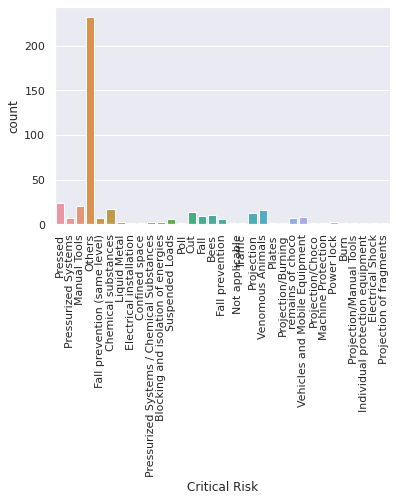

In [154]:
# Others has the highest instance of crtical risk category; far behind though relatively significant other crtical risk categories are - Pressed, Manual tools, chemical 
# substance, venomous animals

# Lowest / nelgible categories in terms of representation are Burn, Projection/Manual tools, Projection/Choco, Plates, plates, poll, traffic, not applicable and Individual 
# projection equipment

crtiticalrisk_graph=sns.countplot(x=cap_data['Critical Risk'])
plt.xticks(rotation=90)
plt.show(crtiticalrisk_graph)
sns.set(rc={'figure.figsize':(15,7)})

In [155]:
# Let's create a data frame of the critical risk factors and look at the top 10 and bottom 10 categories, to see if a  better view / insight can be drawn 
crticalrisk_df=pd.DataFrame(cap_data['Critical Risk'].value_counts().sort_values(ascending=False))
crticalrisk_df

,Critical Risk
Others,232
Pressed,24
Manual Tools,20
Chemical substances,17
Venomous Animals,16
Cut,14
Projection,13
Bees,10
Fall,9
Vehicles and Mobile Equipment,8


In [156]:
# As we have noted above Other category represents more than 50% of the data, and far below thought significant are categories such as - Pressed, Manual tools, 
# Chemical Substance, and Venomous Animals

top10_criticalrisk=crticalrisk_df[0:10]
top10_criticalrisk

,Critical Risk
Others,232
Pressed,24
Manual Tools,20
Chemical substances,17
Venomous Animals,16
Cut,14
Projection,13
Bees,10
Fall,9
Vehicles and Mobile Equipment,8


In [157]:
# We can see that the bottom categories have only 1 instance,and given these might not be very useful for the model to learn, it might be best to either drop them
# or combine these categories with other 
# Even the 11th value from the last one, i.e. not applicable though not shown here carries only 1 record in terms of representation, and the same treatment will apply for it 
# in terms of the bottom10 represented categories. To add, any representation less than 5 can be combined with other, as the model will not be able to learn much and 
# predict accurately, and it's best to jointly represent them in the others category, as these are or lesser probablity of occuring based on the dataset, it should not 
# impact the use case. 

bottom10_criticalrisk=crticalrisk_df.tail(10)
bottom10_criticalrisk

,Critical Risk
Traffic,1
\nNot applicable,1
Confined space,1
Poll,1
Individual protection equipment,1
Projection/Choco,1
Electrical installation,1
Projection/Manual Tools,1
Plates,1
Projection/Burning,1


In [158]:
accident_df = cap_data.groupby(['Potential Accident Level', 'Accident Level']).size().unstack(fill_value=0)

In [159]:
accident_df

Accident Level,I,II,III,IV,V
Potential Accident Level,,,,,
I,49,0,0,0,0
II,88,7,0,0,0
III,89,14,3,0,0
IV,80,16,26,21,0
V,10,3,2,9,7
VI,0,0,0,0,1


In [160]:
accident_table = pd.pivot_table(cap_data, values=['Data'],index=['Potential Accident Level'], columns=['Accident Level'], 
                             aggfunc=np.count_nonzero, margins=True)

In [161]:
# Taking the cross tab/pivot analysis of potential accident level against Accident level further, we note the following insghts (see below text cell) 
accident_table

Data                            
Accident Level                I    II   III    IV    V  All
Potential Accident Level                                   
I                          49.0   NaN   NaN   NaN  NaN   49
II                         88.0   7.0   NaN   NaN  NaN   95
III                        89.0  14.0   3.0   NaN  NaN  106
IV                         80.0  16.0  26.0  21.0  NaN  143
V                          10.0   3.0   2.0   9.0  7.0   31
VI                          NaN   NaN   NaN   NaN  1.0    1
All                       316.0  40.0  31.0  30.0  8.0  425

Analysis: 

Severity 1 - All potential accident severity levels were matched with the actual accident severity levels i.e. 49 instances 

Severity 2 - Of the 95 instances marked as 2 severity in terms of potential accident levels, a majority of them (i.e. 93%) were actually falling in the 1 severity category 

Severity 3- of the 106 potential accident level incidents at severity 3, only 3 instances were actually graded as severity 3 (i.e. ~ 3%)

Severity 4 - of the total 143 potentially accident levels, only 21 (i.e. ~15%), and a majority were actually of 1 severity levels (i.e. > 50%) and the remaining at severity level 3 and 2 in decreasing order. 


Severity 5 - Of the 31 potential accident levels at severity 5, only 7 (i.e.23%) were actually graded as 5 severity level. A majority of them were graded at actual severity levels of 1 and 4, representing 30-35% each. 

Severity 6- The severity instance being only 1 in terms of potential severity levels, was actually classified as 5. 

Conclusion - It is assumed that the 'Potential Accident Level' is the Accident level determinded by an expert and provides a proactive word of caution for the worker/employee/third party to ensure that the necessary protocol are in place to avoid/mitigate the severity of the accident levels  

In [162]:
# Let's look at the country level representation against location 

country_table = pd.pivot_table(cap_data, values=['Genre'],index=['Countries'], columns=['Local'], 
                             aggfunc=np.count_nonzero, margins=True)

In [163]:
# We note that each location is unique for each country i.e. local_appearing for country_01, will have nan values for all other countries 
# As the data is more biased towards country_01 (~ 60%), i.e. it does not make sense to split the data by country or include the country as a input variable for training the model,
# due to the fact that it will impact the accuracy of predicting actual severity for country_02 and country_03 given the limited / lesser representation

country_table

Genre                             ...                                
Local      Local_01 Local_02 Local_03 Local_04  ... Local_10 Local_11 Local_12  All
Countries                                       ...                                
Country_01     57.0      NaN     90.0     56.0  ...      NaN      2.0      NaN  251
Country_02      NaN     24.0      NaN      NaN  ...      NaN      NaN      4.0  130
Country_03      NaN      NaN      NaN      NaN  ...     44.0      NaN      NaN   44
All            57.0     24.0     90.0     56.0  ...     44.0      2.0      4.0  425

[4 rows x 13 columns]

Analysis - While we note that including the country/Local data in the model building stage will perhaps create bias as there are certain countries (country_03) and locations (Local_09) which have relatively lesser representation and can impact the accuracy of the model.

In [164]:
# we will drop the Unnamed column as it does not carry any value
cap_data1=cap_data.drop(columns=['Unnamed: 0'],axis=1)

In [165]:
cap_data1.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [166]:
cap_data1.columns

Index(['Data', 'Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Genre', 'Employee or Third Party',
       'Critical Risk', 'Description'],
      dtype='object')

In [167]:
cap_data1.Data

0      2016-01-01 00:00:00
1      2016-01-02 00:00:00
2      2016-01-06 00:00:00
3      2016-01-08 00:00:00
4      2016-01-10 00:00:00
              ...         
420    2017-07-04 00:00:00
421    2017-07-04 00:00:00
422    2017-07-05 00:00:00
423    2017-07-06 00:00:00
424    2017-07-09 00:00:00
Name: Data, Length: 425, dtype: object

In [168]:
cap_data1.Data = pd.to_datetime(cap_data1.Data)

In [169]:
# We are not going into granularity of time and it seems that quite a few of the entries were recorded at end of day at 12 am and indicating end of day record keeping practice
# We are only splitting the day, month and year to see if there was any particular trend in terms of the incident severity being impacted on a certain month, day 
# While the year is not likely to make much difference, although we will see if there are any other years apart from 2016 in the dataset
cap_data1['day'] =cap_data1['Data'].dt.day
cap_data1['month'] =cap_data1['Data'].dt.month
cap_data1['year'] =cap_data1['Data'].dt.year
cap_data1['dayofweek'] =cap_data1['Data'].dt.dayofweek
cap_data1['quarter'] =cap_data1['Data'].dt.quarter
cap_data1['week in year'] =cap_data1['Data'].dt.isocalendar().week

In [170]:
# let's rearrange the columns and drop the 'data' column, as the information has been extracted in terms of seprate columns in day, month and year 
cap_data1.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,day,month,year,dayofweek,quarter,week in year
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,1,1,2016,4,1,53
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2,1,2016,5,1,53
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,6,1,2016,2,1,1
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,8,1,2016,4,1,1
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,10,1,2016,6,1,1


In [171]:
# As we have extracted the day, month, year, day of the week, week of the year and quarter of the year we can remove the 'data' and/or 'date' column 

cap_data1.drop(columns='Data',axis=1,inplace=True)

In [172]:
cap_data1=cap_data1[['day', 'month', 'year','dayofweek', 'quarter','week in year','Countries', 'Local','Industry Sector', 'Accident Level', 'Genre', 'Employee or Third Party',
                     'Critical Risk','Description']]

In [173]:
cap_data1.head()

,day,month,year,dayofweek,quarter,week in year,Countries,Local,Industry Sector,Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,1,1,2016,4,1,53,Country_01,Local_01,Mining,I,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2,1,2016,5,1,53,Country_02,Local_02,Mining,I,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,6,1,2016,2,1,1,Country_01,Local_03,Mining,I,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,8,1,2016,4,1,1,Country_01,Local_04,Mining,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,10,1,2016,6,1,1,Country_01,Local_04,Mining,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [174]:
# While the data is split between 2016 and 2017, with majority coming from 2016, the year column is not likely to add any value to the model training can can be dropped
cap_data1.year.value_counts()

2016    285
2017    140
Name: year, dtype: int64

In [175]:
cap_data1.drop(columns='year',axis=1,inplace=True)

In [176]:
# let's look at the impact of incidents by month to see if there are any insights 
# It seems like majority of accidents have happened during the first 6 months of the year, indicating potential industry season, due to specific reasons, 
# for instance favourable external/weather conditions, although it is not clear which country we are referring to here 
cap_data1.month.value_counts().sort_values(ascending=False)

2     61
3     53
4     52
6     51
5     41
1     40
7     24
9     24
12    24
8     21
10    21
11    13
Name: month, dtype: int64

In [177]:
# let's look at the actual severity by month, to see if there are any insights 
# It appears that there is no particular trend with regards to the month, except that majority of the data is represented by severity 1 for all months 
# to add, in terms of insights: 
# 1) is that the severity 2 and 4 were seen highest in Februray, however this is not significantly differnt from March
# 2) From August onwards there are no severity incidents of level 5 (V) 


month_table = pd.pivot_table(cap_data1, values=['Genre'],index=['month'], columns=['Accident Level'], 
                             aggfunc=np.count_nonzero, margins=True)

In [178]:
month_table

Genre                            
Accident Level      I    II   III    IV    V  All
month                                            
1                33.0   2.0   2.0   2.0  1.0   40
2                42.0   9.0   4.0   5.0  1.0   61
3                37.0   7.0   3.0   3.0  3.0   53
4                44.0   2.0   3.0   3.0  NaN   52
5                32.0   3.0   1.0   4.0  1.0   41
6                41.0   3.0   2.0   4.0  1.0   51
7                16.0   1.0   4.0   2.0  1.0   24
8                15.0   3.0   2.0   1.0  NaN   21
9                18.0   3.0   2.0   1.0  NaN   24
10               11.0   4.0   4.0   2.0  NaN   21
11                9.0   1.0   1.0   2.0  NaN   13
12               18.0   2.0   3.0   1.0  NaN   24
All             316.0  40.0  31.0  30.0  8.0  425

In [179]:
# let's look at the same analysis by day

day_table = pd.pivot_table(cap_data1, values=['Genre'],index=['day'], columns=['Accident Level'], 
                             aggfunc=np.count_nonzero, margins=True)

In [180]:
# Again no particular insights seen except that on certain days we there were increasing proportion / representation of more than one severity level i.e. from 2- 5
# for instance in day 3 and day 8 of the month 
# this could be purley random and/or noise 

day_table

Genre                            
Accident Level      I    II   III    IV    V  All
day                                              
1                12.0   4.0   NaN   NaN  NaN   16
2                13.0   NaN   NaN   1.0  1.0   15
3                 6.0   2.0   2.0   NaN  NaN   10
4                16.0   NaN   3.0   2.0  1.0   22
5                14.0   NaN   NaN   NaN  NaN   14
6                 8.0   1.0   3.0   1.0  NaN   13
7                 9.0   1.0   NaN   1.0  NaN   11
8                17.0   4.0   2.0   1.0  1.0   25
9                 9.0   1.0   1.0   1.0  NaN   12
10                6.0   3.0   1.0   2.0  1.0   13
11               14.0   NaN   2.0   2.0  NaN   18
12                7.0   NaN   4.0   NaN  NaN   11
13               11.0   2.0   2.0   NaN  NaN   15
14                8.0   1.0   2.0   1.0  NaN   12
15               12.0   2.0   1.0   NaN  NaN   15
16               15.0   3.0   NaN   1.0  NaN   19
17               12.0   1.0   1.0   1.0  NaN   15
18               10.0   NaN   NaN   4.0  1.0   15
19                8.0   NaN   2.0   1.0  NaN   11
20                9.0   NaN   NaN   1.0  1.0   11
21                8.0   1.0   1.0   NaN  NaN   10
22               14.0   1.0   NaN   1.0  1.0   17
23               14.0   2.0   NaN   1.0  NaN   17
24               13.0   1.0   NaN   2.0  NaN   16
25                9.0   2.0   NaN   3.0  1.0   15
26                8.0   NaN   1.0   NaN  NaN    9
27                5.0   3.0   1.0   NaN  NaN    9
28                6.0   NaN   NaN   NaN  NaN    6
29                7.0   3.0   1.0   1.0  NaN   12
30               10.0   2.0   NaN   2.0  NaN   14
31                6.0   NaN   1.0   NaN  NaN    7
All             316.0  40.0  31.0  30.0  8.0  425

In [181]:
# Here Monday is denoted by 0 and Sunday by 6, it appears that the workers are working in shifts, across all 7 days a week 
# Observations: 
# 1) It appears that actual accident severity of 5 happened only on Wednesday and Saturday 
# 2) It appears that grade 4 severity risk happened on all days except on the on Monday, with highest incidents on Tuesday, Thursday & Friday 
# 3) Grade 3 severity incidents were highest on Monday, and lowest from Tues- Thursday 
# 4) Grade 2 severity incidents were highest on Wednesday, and lowest on Sunday 
# 5) Grade 1 severity incidents were lowest on Sunday
# 6) Overall no of incidents were lowest on Sunday 

dayofweek_table = pd.pivot_table(cap_data1, values=['Genre'],index=['dayofweek'], columns=['Accident Level'], 
                             aggfunc=np.count_nonzero, margins=True)

In [182]:
dayofweek_table

Genre                            
Accident Level      I    II   III    IV    V  All
dayofweek                                        
0                37.0   7.0   9.0   NaN  NaN   53
1                55.0   5.0   2.0   8.0  NaN   70
2                47.0   9.0   2.0   1.0  4.0   63
3                68.0   3.0   2.0   6.0  NaN   79
4                45.0   7.0   4.0   6.0  NaN   62
5                35.0   7.0   7.0   4.0  4.0   57
6                29.0   2.0   5.0   5.0  NaN   41
All             316.0  40.0  31.0  30.0  8.0  425

In [183]:
quarter_table = pd.pivot_table(cap_data1, values=['Genre'],index=['quarter'], columns=['Accident Level'], 
                             aggfunc=np.count_nonzero, margins=True)

In [184]:
# Overall, the highest incidents were in Q1 and lowest in Q4 
# Severity 2 - 5, were hightest is quarter1; incident grade 2, were significantly higher in quarter 1 compared to the other quarters 
# In querter 4, there were no incidents of severity 5 
quarter_table

Genre                            
Accident Level      I    II   III    IV    V  All
quarter                                          
1               112.0  18.0   9.0  10.0  5.0  154
2               117.0   8.0   6.0  11.0  2.0  144
3                49.0   7.0   8.0   4.0  1.0   69
4                38.0   7.0   8.0   5.0  NaN   58
All             316.0  40.0  31.0  30.0  8.0  425

In [185]:
weekinyear_table = pd.pivot_table(cap_data1, values=['Genre'],index=['week in year'], columns=['Accident Level'], 
                             aggfunc=np.count_nonzero, margins=True)

In [186]:
# No particulaer trend is noted here 

weekinyear_table

Genre                            
Accident Level      I    II   III    IV    V  All
week in year                                     
1                 7.0   1.0   1.0   1.0  NaN   10
2                 8.0   NaN   NaN   NaN  NaN    8
3                 6.0   NaN   1.0   1.0  NaN    8
4                 8.0   1.0   NaN   NaN  1.0   10
5                 9.0   NaN   1.0   1.0  NaN   11
6                 9.0   4.0   NaN   1.0  NaN   14
7                14.0   3.0   2.0   1.0  1.0   21
8                12.0   NaN   NaN   2.0  NaN   14
9                11.0   2.0   2.0   NaN  NaN   15
10                9.0   2.0   2.0   NaN  1.0   14
11                8.0   3.0   NaN   1.0  1.0   13
12                4.0   1.0   NaN   2.0  1.0    8
13                9.0   1.0   1.0   NaN  NaN   11
14               11.0   NaN   1.0   NaN  NaN   12
15               14.0   NaN   NaN   NaN  NaN   14
16                7.0   1.0   NaN   NaN  NaN    8
17                9.0   1.0   1.0   3.0  NaN   14
18                8.0   2.0   1.0   1.0  NaN   12
19                5.0   NaN   NaN   NaN  1.0    6
20               10.0   NaN   NaN   2.0  NaN   12
21                7.0   1.0   NaN   1.0  NaN    9
22                7.0   1.0   NaN   NaN  1.0    9
23               12.0   NaN   NaN   1.0  NaN   13
24                9.0   1.0   1.0   3.0  NaN   14
25               12.0   1.0   1.0   NaN  NaN   14
26                2.0   NaN   NaN   NaN  1.0    3
27                7.0   NaN   3.0   2.0  NaN   12
28                3.0   NaN   1.0   NaN  NaN    4
29                4.0   NaN   NaN   NaN  NaN    4
30                2.0   1.0   NaN   NaN  NaN    3
31                3.0   2.0   NaN   NaN  NaN    5
32                2.0   NaN   2.0   1.0  NaN    5
33                3.0   NaN   NaN   NaN  NaN    3
34                5.0   NaN   NaN   NaN  NaN    5
35                4.0   2.0   1.0   1.0  NaN    8
36                3.0   NaN   NaN   NaN  NaN    3
37                4.0   1.0   1.0   NaN  NaN    6
38                6.0   1.0   NaN   NaN  NaN    7
39                3.0   1.0   NaN   NaN  NaN    4
40                4.0   1.0   1.0   NaN  NaN    6
41                2.0   1.0   2.0   NaN  NaN    5
42                2.0   1.0   NaN   1.0  NaN    4
43                3.0   NaN   1.0   1.0  NaN    5
44                NaN   NaN   NaN   1.0  NaN    1
45                3.0   NaN   NaN   1.0  NaN    4
46                NaN   NaN   1.0   NaN  NaN    1
47                4.0   NaN   NaN   NaN  NaN    4
48                5.0   1.0   NaN   NaN  NaN    6
49                3.0   1.0   NaN   NaN  NaN    4
50                6.0   NaN   2.0   NaN  NaN    8
51                4.0   1.0   NaN   NaN  NaN    5
52                2.0   NaN   1.0   1.0  NaN    4
53                2.0   NaN   NaN   NaN  NaN    2
All             316.0  40.0  31.0  30.0  8.0  425

In [187]:
cap_data1.columns

Index(['day', 'month', 'dayofweek', 'quarter', 'week in year', 'Countries',
       'Local', 'Industry Sector', 'Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

Analysis - While we can drop the month, date, week in the year column as it is not likley to add any value to the model in terms of accuracy and results, the quarter and dayofweek seems to be carrying some insight that will help make the model robust

In [188]:
cap_data1.drop(columns=['month','day','week in year'],axis=1,inplace=True)

In [189]:
cap_data1.head()

,dayofweek,quarter,Countries,Local,Industry Sector,Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,4,1,Country_01,Local_01,Mining,I,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,5,1,Country_02,Local_02,Mining,I,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,1,Country_01,Local_03,Mining,I,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,4,1,Country_01,Local_04,Mining,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,6,1,Country_01,Local_04,Mining,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [190]:
# let's do an analysis by gender and accident levels 
gender_table = pd.pivot_table(cap_data1, values=['Critical Risk'],index=['Genre'], columns=['Accident Level'], 
                             aggfunc=np.count_nonzero, margins=True)

In [191]:
gender_table

Critical Risk                            
Accident Level             I    II   III    IV    V  All
Genre                                                   
Female                  18.0   3.0   1.0   NaN  NaN   22
Male                   298.0  37.0  30.0  30.0  8.0  403
All                    316.0  40.0  31.0  30.0  8.0  425

Analysis- 

1) From the above we note that there were no severity 4 and 5 incidents occuring for female employees/ staff; indicating that men are preferred for riskeir operations / jobs. 

2) All severity 4 & 5 incidents happened for the male gender 

3) For the female gender  and male gender 82% and 74% of the incidents were at severity level 1 

4) For the female gender only 1/22 incident (~ 5%) occured in the severity category 3 

5) For the male gender the 2nd highest instances happened at the severity level 2 at 9%, with the same proportion represented in the severity category 3 and 4 i.e. 7% each.

In [192]:
# let's look at gender, employee and critical risk pivot
gendernemp_table = pd.pivot_table(cap_data1, values=['Critical Risk'],index=['Genre','Employee or Third Party'], columns=['Accident Level'], 
                             aggfunc=np.count_nonzero, margins=True)

In [193]:
gendernemp_table

Critical Risk                            
Accident Level                             I    II   III    IV    V  All
Genre  Employee or Third Party                                          
Female Employee                          6.0   1.0   1.0   NaN  NaN    8
       Third Party                       8.0   1.0   NaN   NaN  NaN    9
       Third Party (Remote)              4.0   1.0   NaN   NaN  NaN    5
Male   Employee                        134.0  14.0  13.0  10.0  NaN  171
       Third Party                     126.0  18.0  14.0  16.0  6.0  180
       Third Party (Remote)             38.0   5.0   3.0   4.0  2.0   52
All                                    316.0  40.0  31.0  30.0  8.0  425

Analysis - 

1) For Female gender, the employee or third party type for severity 1 appears to be related i.e. for third party being highest and third party remote being lowest, while for severity 2 it did not make any differnce. 

2) For Male, the severity level 3 and 4, had higher representation from third party employees compared to Employee which had the same total representation, and for severity 5, there were no instances for the employee and a majority of them coming from third party.

A potential insight coming out of this could be that the specially in the male category the third party employees seem to have higher instances of Grade 4 and 5 risks, indicating lack of proper training.  



In [194]:
# let's add a new dimension and check the total of the words for each f the descrioption 

cap_data1['len_Description'] = cap_data1['Description'].apply(lambda x: len(x.split(" ")))
cap_data1

,dayofweek,quarter,Countries,Local,Industry Sector,Accident Level,Genre,Employee or Third Party,Critical Risk,Description,len_Description
0,4,1,Country_01,Local_01,Mining,I,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,80
1,5,1,Country_02,Local_02,Mining,I,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,54
2,2,1,Country_01,Local_03,Mining,I,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,57
3,4,1,Country_01,Local_04,Mining,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,97
4,6,1,Country_01,Local_04,Mining,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,88
...,...,...,...,...,...,...,...,...,...,...,...
420,1,3,Country_01,Local_04,Mining,I,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w...",38
421,1,3,Country_01,Local_03,Mining,I,Female,Employee,Others,The collaborator moved from the infrastructure...,39
422,2,3,Country_02,Local_09,Metals,I,Male,Employee,Venomous Animals,During the environmental monitoring activity i...,44
423,3,3,Country_02,Local_05,Metals,I,Male,Employee,Cut,The Employee performed the activity of strippi...,33


In [195]:
# we can see that the majority of words i.e. 75% of the data is under 85 word limit 

# though the hugh difference between the words in the 75% and 100% percentile indicates possible presence of outliers

cap_data1.len_Description.describe()

count    425.000000
mean      65.661176
std       32.436048
min       16.000000
25%       40.000000
50%       60.000000
75%       84.000000
max      183.000000
Name: len_Description, dtype: float64

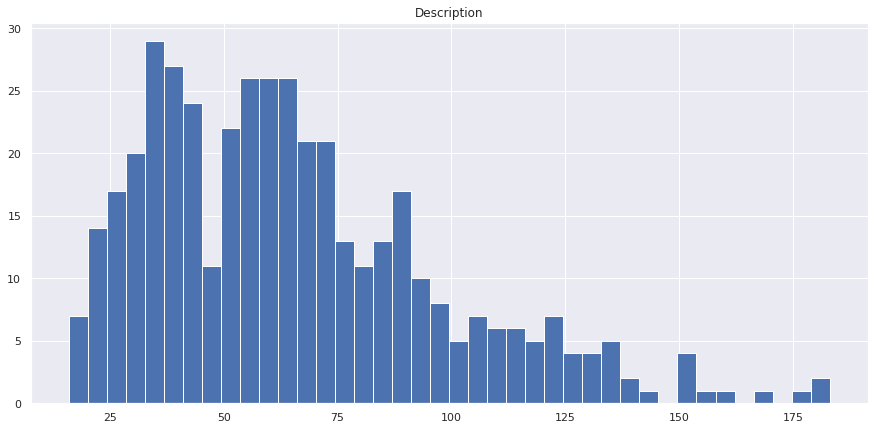

In [196]:
# As noted above a majority of the records have words falling within the 85 word limit, also suggesting that the data is righ skewed 
description_words = []

for i in cap_data1['Description']:
  description_words.append(len(i.split()))

word_length = pd.DataFrame({'Description':description_words})
sns.set(rc={'figure.figsize':(15,7)})
word_length.hist(bins = 40)
plt.show()

 To serve the model from an effeciency point of view, we will keep the word limit as 100 going forward, in terms of the description column.  